In [28]:
#Pablo Sebastián Herrera
#Lab 1. Time Series Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Análisis Exploratorio de los Datos

In [29]:
#lectura de datos
df_importaciones = pd.read_excel("Estadisticas.xlsx",sheet_name = "IMPORTACION")
df_consumo = pd.read_excel("Estadisticas.xlsx",sheet_name = "CONSUMO")

df_importaciones.columns

Index(['Fecha', 'Aceites lubricantes', 'Asfalto ', 'Bunker', 'Ceras',
       'Combustible turbo jet', 'Diesel bajo azufre',
       'Diesel ultra bajo azufre', 'Gas licuado de petróleo',
       'Gasolina de aviación', 'Gasolina regular', 'Gasolina superior',
       'Grasas lubricantes', 'Kerosina', 'Mezclas oleosas', 'Naftas',
       'Petcoke', 'Petróleo crudo', 'Solventes', 'Butano',
       'Diesel alto azufre', 'MTBE', 'Orimulsión', 'Petróleo reconstituido',
       'Total importación'],
      dtype='object')

In [30]:
columns = ["Fecha", "Gasolina regular","Gasolina superior","Diesel alto azufre",]
importaciones = df_importaciones[columns].copy()
consumo = df_consumo[columns].copy()

importaciones.head(5)

,Fecha,Gasolina regular,Gasolina superior,Diesel alto azufre
0,2001-01-01,177776.50,373963.96,566101.99
1,2001-02-01,123115.99,243091.07,489525.80
2,2001-03-01,161726.42,312084.38,575559.68
3,2001-04-01,127338.74,285054.89,437745.42
4,2001-05-01,168730.19,300913.67,552609.13


In [31]:
print(f"Cantidad de variables :{importaciones.shape[1]}")
print("-"*100)
print(f"Cantidad datos en Importaciones: {importaciones.shape[0]}")
print(f"Cantidad datos en Consumo: {consumo.shape[0]}")


Cantidad de variables :4
----------------------------------------------------------------------------------------------------
Cantidad datos en Importaciones: 288
Cantidad datos en Consumo: 300


In [32]:
print(f"Tipos de variables:\n{importaciones.dtypes}")

Tipos de variables:
Fecha                 datetime64[ns]
Gasolina regular             float64
Gasolina superior            float64
Diesel alto azufre           float64
dtype: object


In [33]:
print(f"Variables nulas o vacías en importaciones:\n{importaciones.isnull().sum()}")
print("-"*100)
print(f"Variables nulas o vacías en consumo:\n{consumo.isnull().sum()}")

Variables nulas o vacías en importaciones:
Fecha                 0
Gasolina regular      0
Gasolina superior     0
Diesel alto azufre    0
dtype: int64
----------------------------------------------------------------------------------------------------
Variables nulas o vacías en consumo:
Fecha                 0
Gasolina regular      0
Gasolina superior     0
Diesel alto azufre    0
dtype: int64


In [34]:
print(f"Estadisticas Descriptivas Importaciones:\n{importaciones[['Gasolina regular', 'Gasolina superior', 'Diesel alto azufre']].describe()}")
print("-"*100)
print(f"Estadisticas Descriptivas Consumo:\n{consumo[['Gasolina regular', 'Gasolina superior', 'Diesel alto azufre']].describe()}")

Estadisticas Descriptivas Importaciones:
       Gasolina regular  Gasolina superior  Diesel alto azufre
count      2.880000e+02       2.880000e+02        2.880000e+02
mean       4.129493e+05       4.909544e+05        5.541217e+05
std        2.432627e+05       1.565581e+05        4.097571e+05
min        8.101530e+04       1.702925e+05        0.000000e+00
25%        2.082069e+05       3.693299e+05        0.000000e+00
50%        3.275593e+05       4.813002e+05        6.380928e+05
75%        5.761171e+05       6.083053e+05        8.447706e+05
max        1.141366e+06       1.227174e+06        1.595699e+06
----------------------------------------------------------------------------------------------------
Estadisticas Descriptivas Consumo:
       Gasolina regular  Gasolina superior  Diesel alto azufre
count        300.000000         300.000000        3.000000e+02
mean      397478.894458      470248.678849        5.144313e+05
std       219102.049432      113504.653305        3.688977e+05
min 

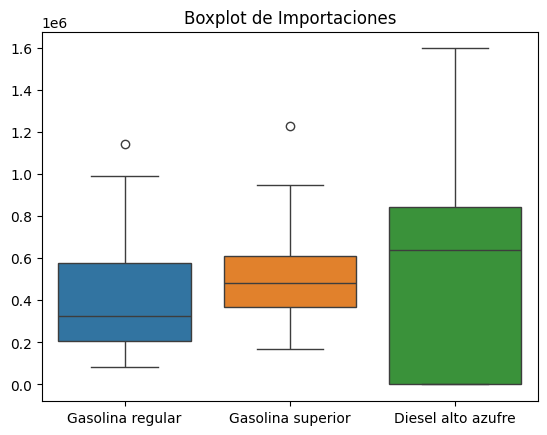

In [35]:
sns.boxplot(data=importaciones[['Gasolina regular', 'Gasolina superior', 'Diesel alto azufre']])
plt.title("Boxplot de Importaciones")
plt.show()  

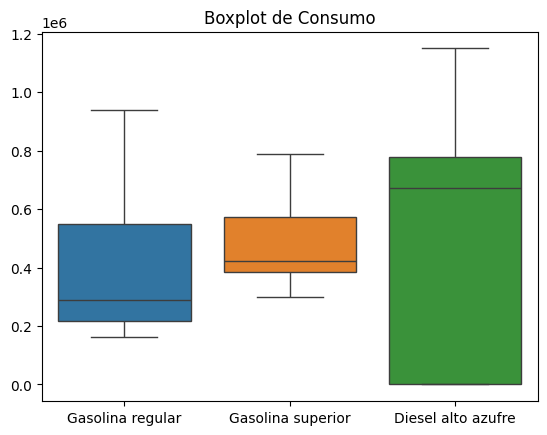

In [36]:
sns.boxplot(data=consumo[['Gasolina regular', 'Gasolina superior', 'Diesel alto azufre']])
plt.title("Boxplot de Consumo")
plt.show() 

In [37]:
print(f"Cantidad de datos duplicados en importaciones: {importaciones.duplicated().sum()}")
print(f"Cantidad de datos duplicados en consumo: {consumo.duplicated().sum()}")

Cantidad de datos duplicados en importaciones: 0
Cantidad de datos duplicados en consumo: 0


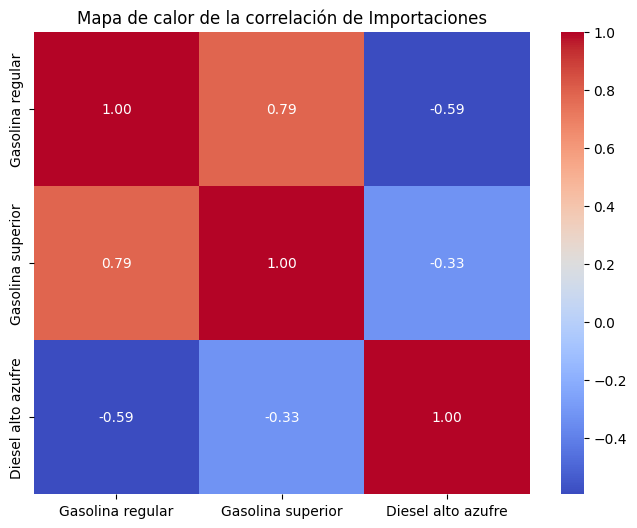

In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    importaciones[["Gasolina regular", "Gasolina superior", "Diesel alto azufre"]].corr(), 
    annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de calor de la correlación de Importaciones")
plt.show()


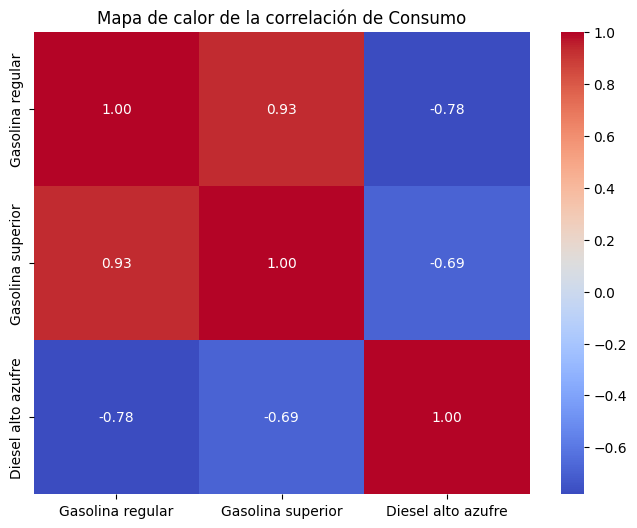

In [39]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    consumo[["Gasolina regular", "Gasolina superior", "Diesel alto azufre"]].corr(), 
    annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de calor de la correlación de Consumo")
plt.show()


In [40]:
totales_importaciones = importaciones[['Gasolina regular', 'Gasolina superior', 'Diesel alto azufre']].sum()
totales_consumo = consumo[['Gasolina regular', 'Gasolina superior', 'Diesel alto azufre']].sum()


In [41]:
print(f"Importaciones hidrocarburos a lo largo de los años:\n{totales_importaciones}")
print("-"*100)
print(f"Consumo hidrocarburos a lo largo de los años:\n{totales_consumo}")

Importaciones hidrocarburos a lo largo de los años:
Gasolina regular      1.189294e+08
Gasolina superior     1.413949e+08
Diesel alto azufre    1.595871e+08
dtype: float64
----------------------------------------------------------------------------------------------------
Consumo hidrocarburos a lo largo de los años:
Gasolina regular      1.192437e+08
Gasolina superior     1.410746e+08
Diesel alto azufre    1.543294e+08
dtype: float64


<Figure size 1000x600 with 0 Axes>

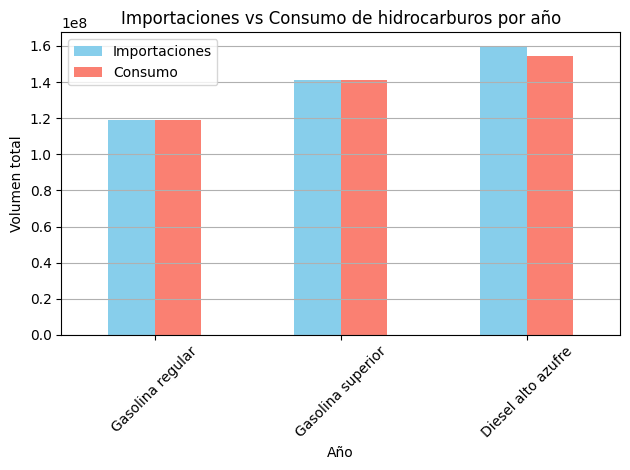

In [42]:
df_comparado = pd.DataFrame({
    'Importaciones': totales_importaciones,
    'Consumo': totales_consumo
})

# Crear gráfico combinado
plt.figure(figsize=(10, 6))
df_comparado.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Importaciones vs Consumo de hidrocarburos por año")
plt.ylabel("Volumen total")
plt.xlabel("Año")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.grid(axis='y')
plt.show()



In [43]:
importaciones['Año'] = importaciones['Fecha'].dt.year
importaciones['Mes'] = importaciones['Fecha'].dt.month
consumo['Año'] = consumo['Fecha'].dt.year
consumo['Mes'] = consumo['Fecha'].dt.month

# Productos a analizar
productos = ['Gasolina regular', 'Gasolina superior', 'Diesel alto azufre']

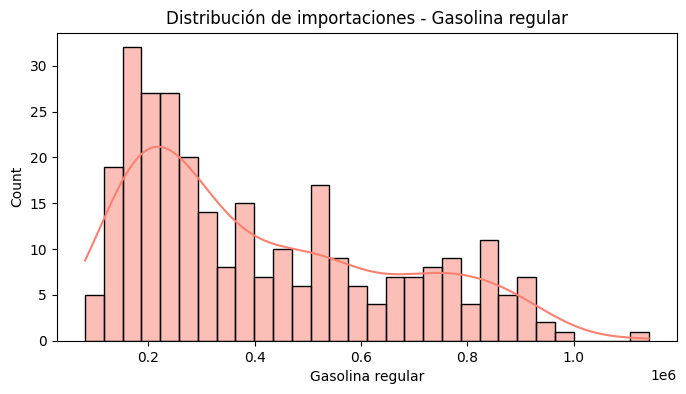

Gasolina regular: p-valor normaltest = 0.0000
→ No se distribuye normalmente.


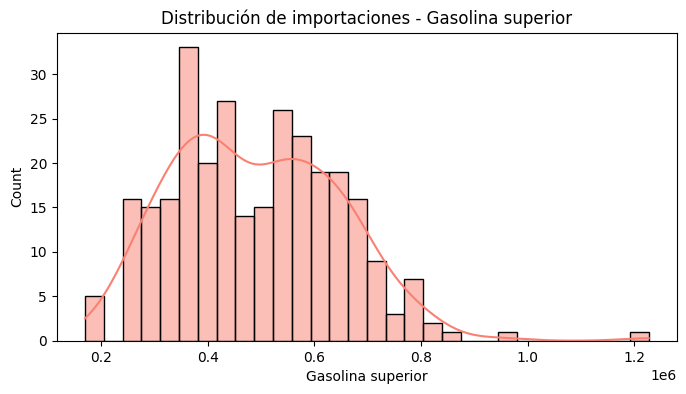

Gasolina superior: p-valor normaltest = 0.0003
→ No se distribuye normalmente.


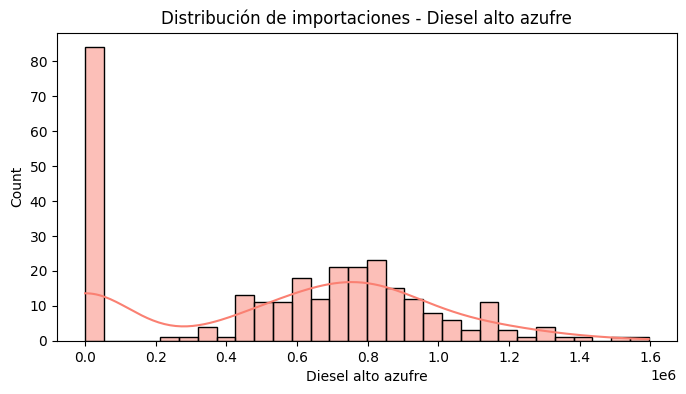

Diesel alto azufre: p-valor normaltest = 0.0000
→ No se distribuye normalmente.


In [44]:
for producto in productos:
    plt.figure(figsize=(8, 4))
    sns.histplot(importaciones[producto].dropna(), kde=True, bins=30,color="salmon")
    plt.title(f'Distribución de importaciones - {producto}')
    plt.show()

    stat, p = normaltest(importaciones[producto].dropna())
    print(f"{producto}: p-valor normaltest = {p:.4f}")
    if p < 0.05:
        print("→ No se distribuye normalmente.")
    else:
        print("→ Puede considerarse normal.")


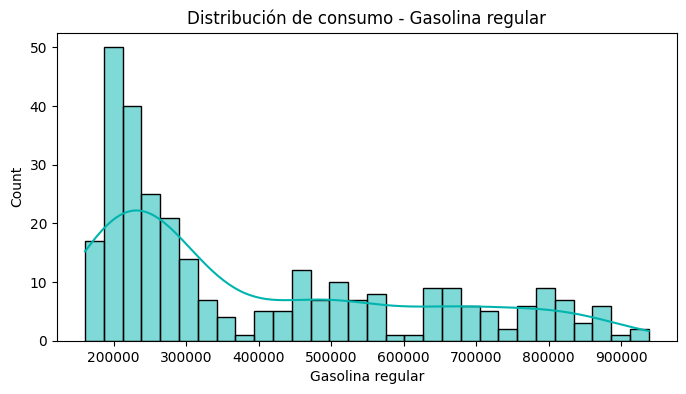

Gasolina regular: p-valor normaltest = 0.0000
→ No se distribuye normalmente.


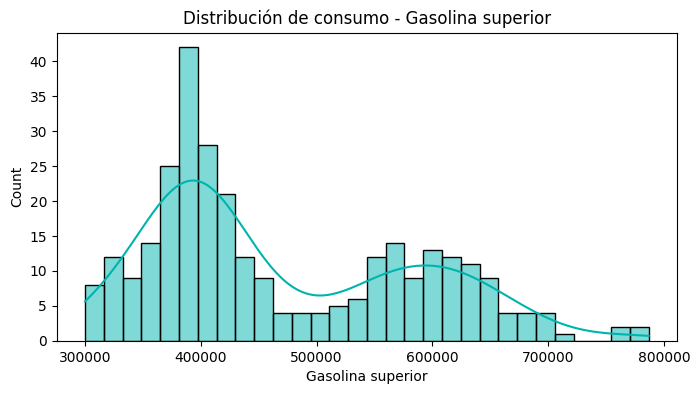

Gasolina superior: p-valor normaltest = 0.0003
→ No se distribuye normalmente.


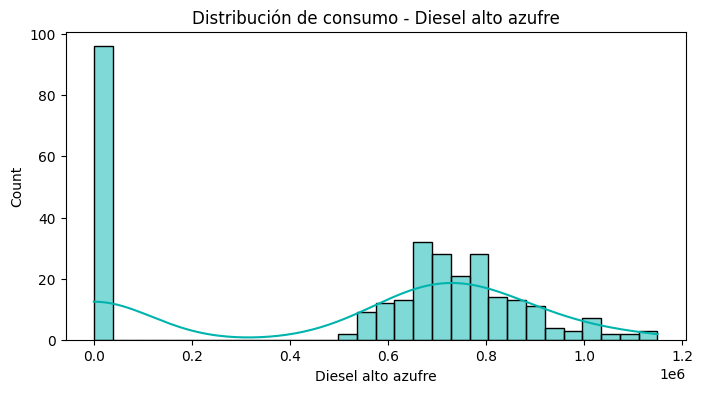

Diesel alto azufre: p-valor normaltest = 0.0000
→ No se distribuye normalmente.


In [45]:
for producto in productos:
    plt.figure(figsize=(8, 4))
    sns.histplot(consumo[producto].dropna(), kde=True, bins=30,color="#00b4ae")
    plt.title(f'Distribución de consumo - {producto}')
    plt.show()

    stat, p = normaltest(importaciones[producto].dropna())
    print(f"{producto}: p-valor normaltest = {p:.4f}")
    if p < 0.05:
        print("→ No se distribuye normalmente.")
    else:
        print("→ Puede considerarse normal.")

<Figure size 1000x500 with 0 Axes>

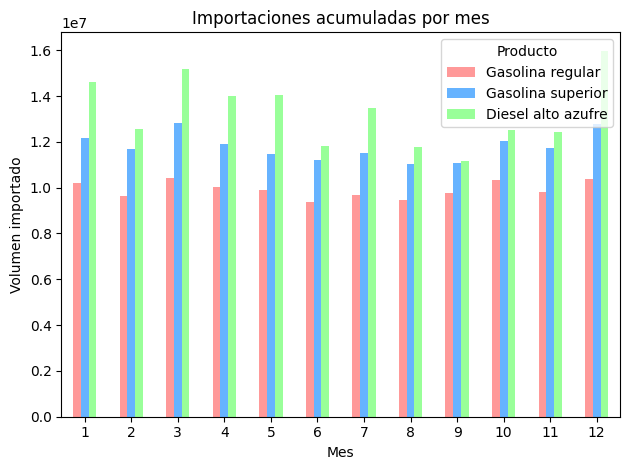

In [46]:
mensual = importaciones.groupby('Mes')[productos].sum()

plt.figure(figsize=(10, 5))
mensual.plot(kind='bar',color=['#FF9999', '#66B3FF', '#99FF99'])
plt.title("Importaciones acumuladas por mes")
plt.xlabel("Mes")
plt.ylabel("Volumen importado")
plt.xticks(rotation=0)
plt.legend(title='Producto')
plt.tight_layout()
plt.show()


<Figure size 1000x500 with 0 Axes>

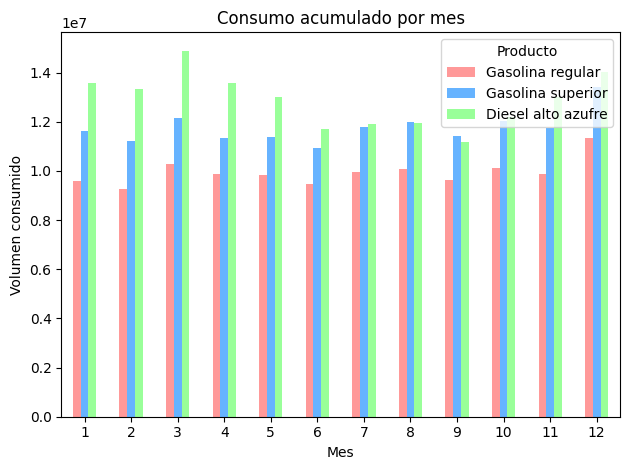

In [47]:
mensual = consumo.groupby('Mes')[productos].sum()

plt.figure(figsize=(10, 5))
mensual.plot(kind='bar', color=['#FF9999', '#66B3FF', '#99FF99'])
plt.title("Consumo acumulado por mes")
plt.xlabel("Mes")
plt.ylabel("Volumen consumido")
plt.xticks(rotation=0)
plt.legend(title='Producto')
plt.tight_layout()
plt.show()


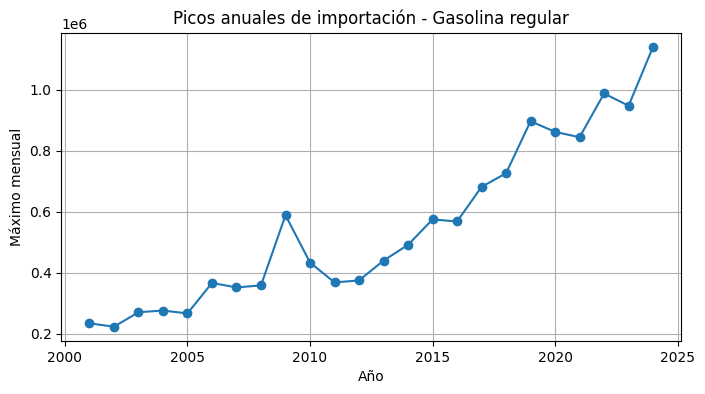

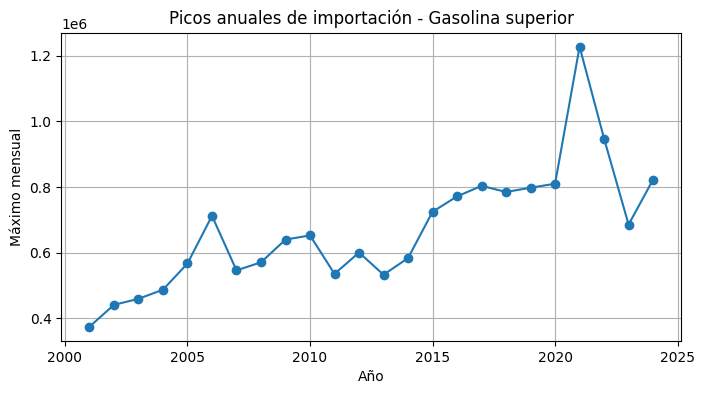

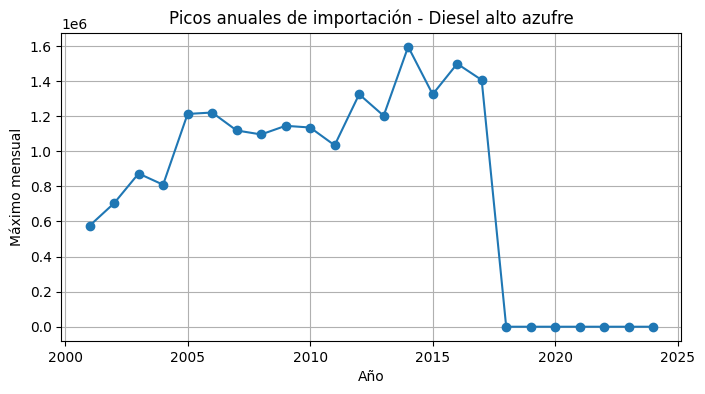

In [48]:
for producto in productos:
    anual = importaciones.groupby('Año')[producto].max()
    plt.figure(figsize=(8, 4))
    anual.plot(marker='o')
    plt.title(f'Picos anuales de importación - {producto}')
    plt.xlabel("Año")
    plt.ylabel("Máximo mensual")
    plt.grid(True)
    plt.show()


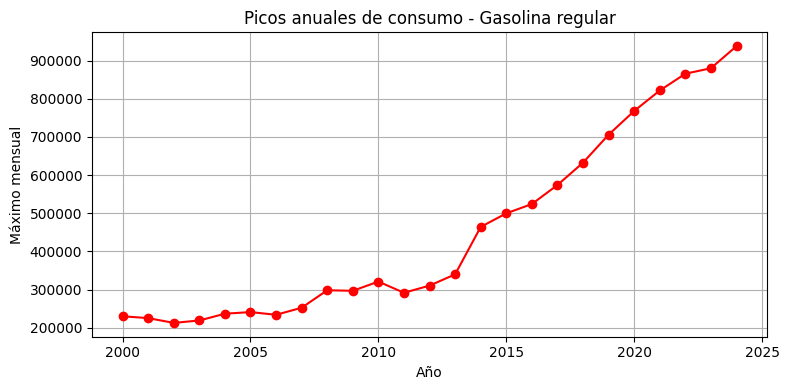

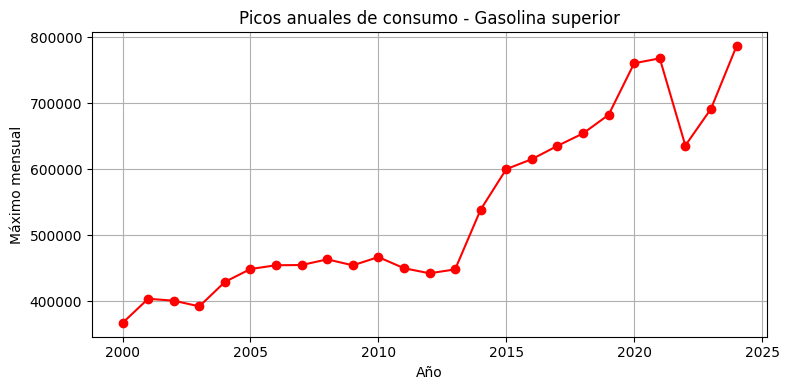

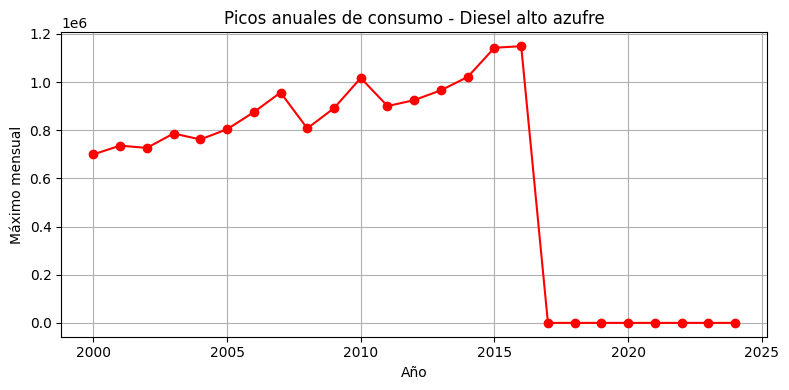

In [49]:
for producto in productos:
    anual = consumo.groupby('Año')[producto].max()
    plt.figure(figsize=(8, 4))
    anual.plot(marker='o', color='red')  # El color va aquí
    plt.title(f'Picos anuales de consumo - {producto}')
    plt.xlabel("Año")
    plt.ylabel("Máximo mensual")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


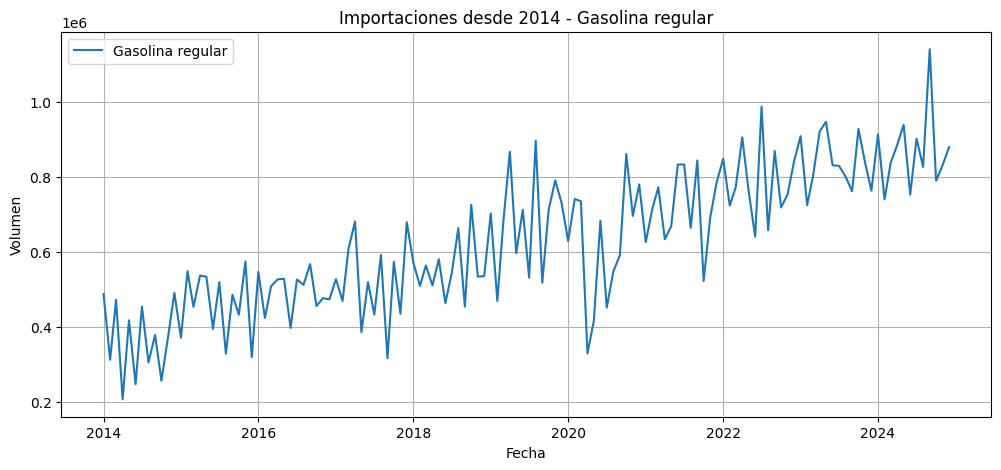

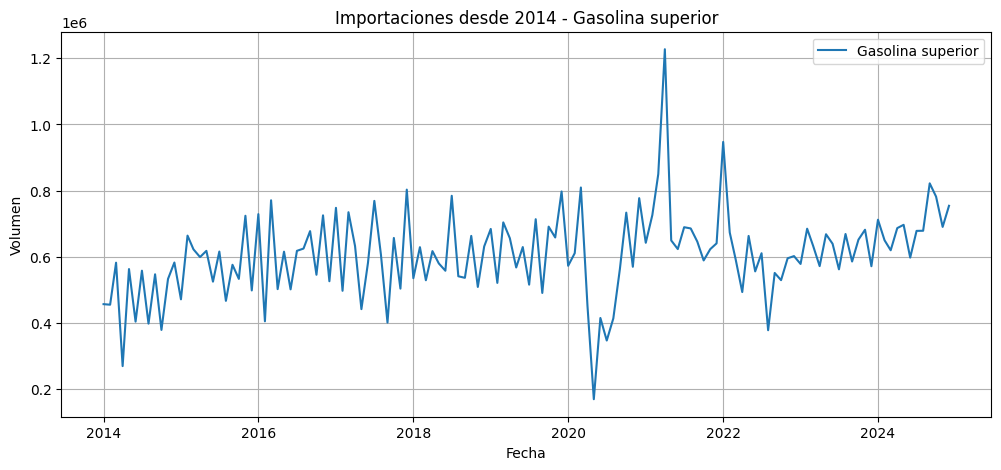

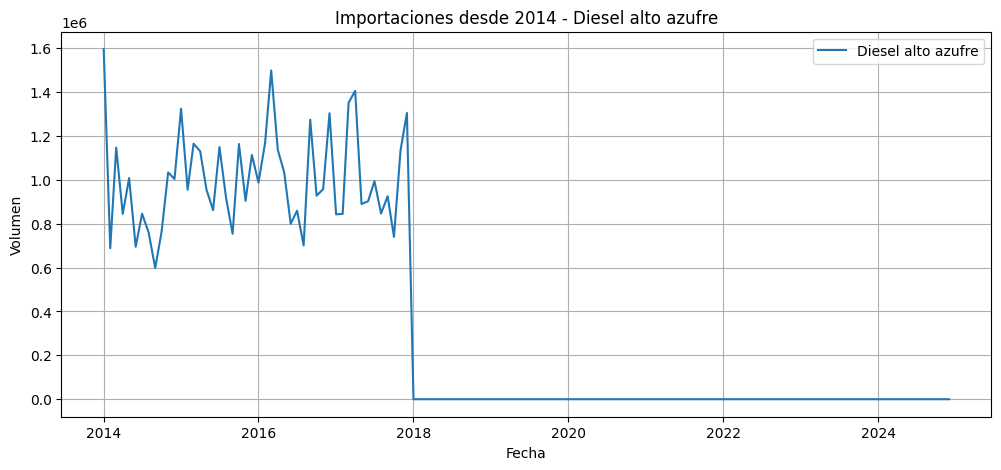

In [50]:
desde = 2014
reciente = importaciones[importaciones['Año'] >= desde]

for producto in productos:
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=reciente, x='Fecha', y=producto, label=producto)
    plt.title(f'Importaciones desde {desde} - {producto}')
    plt.xlabel("Fecha")
    plt.ylabel("Volumen")
    plt.grid(True)
    plt.show()


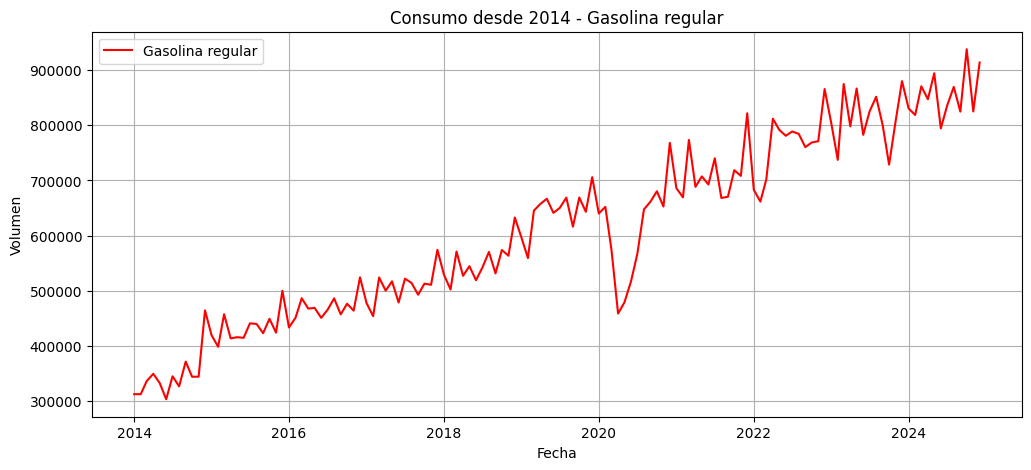

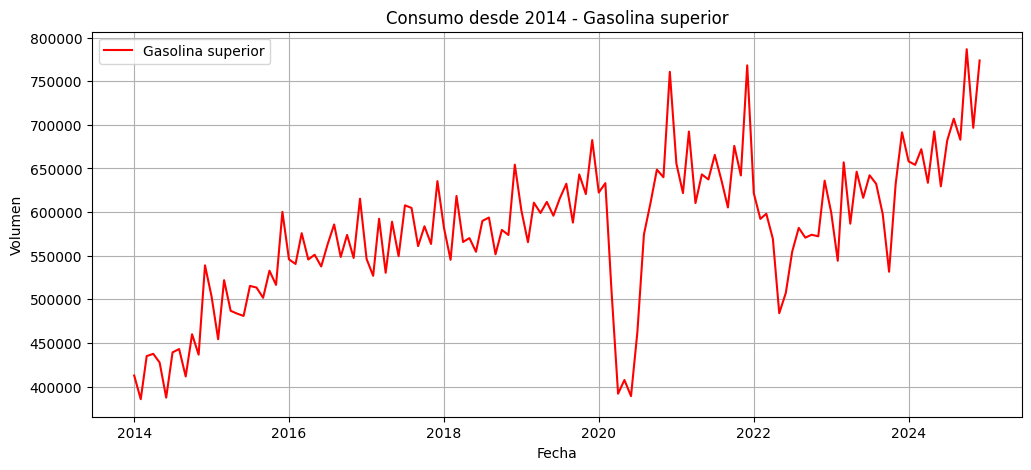

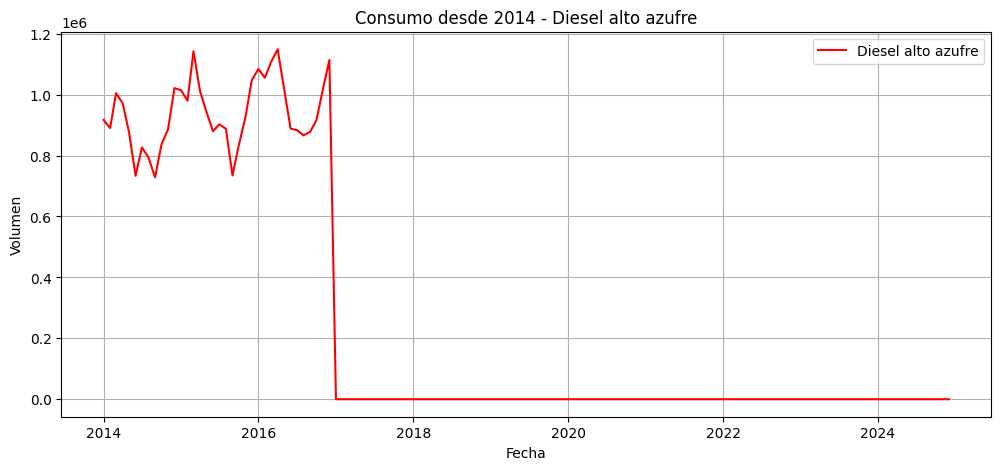

In [51]:
desde = 2014
reciente = consumo[consumo['Año'] >= desde]

for producto in productos:
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=reciente, x='Fecha', y=producto, label=producto,color="red")
    plt.title(f'Consumo desde {desde} - {producto}')
    plt.xlabel("Fecha")
    plt.ylabel("Volumen")
    plt.grid(True)
    plt.show()


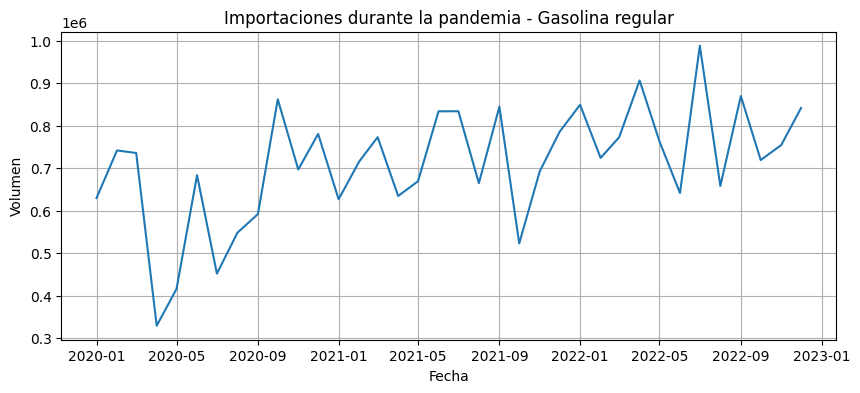

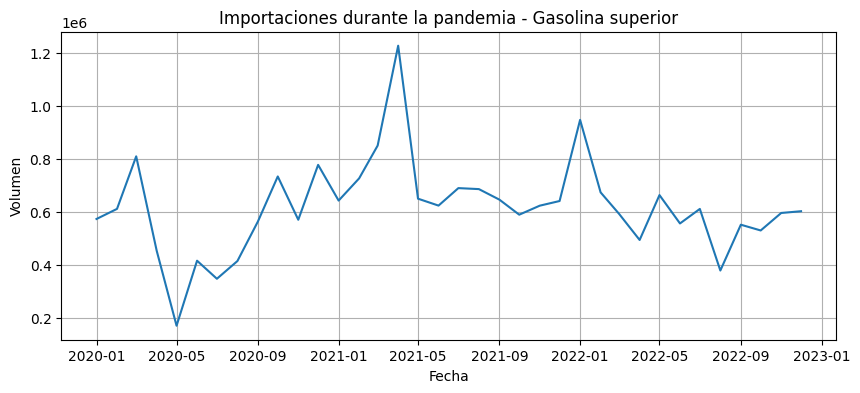

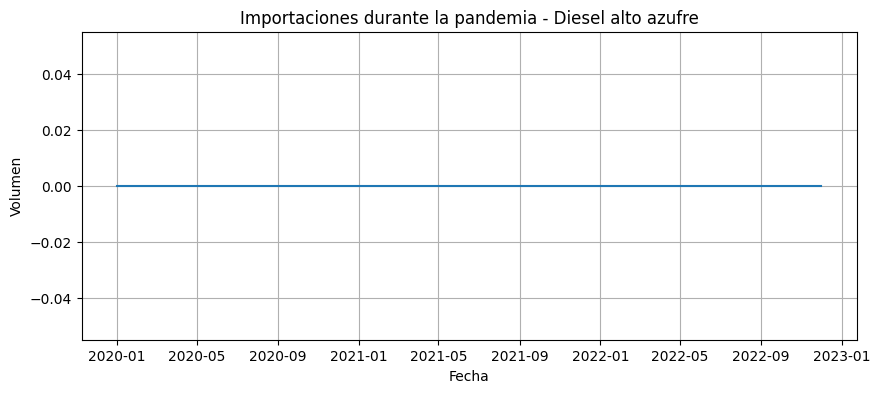

In [52]:
pandemia = importaciones[(importaciones['Año'] >= 2020) & (importaciones['Año'] <= 2022)]

for producto in productos:
    plt.figure(figsize=(10, 4))
    sns.lineplot(data=pandemia, x='Fecha', y=producto)
    plt.title(f'Importaciones durante la pandemia - {producto}')
    plt.xlabel("Fecha")
    plt.ylabel("Volumen")
    plt.grid(True)
    plt.show()


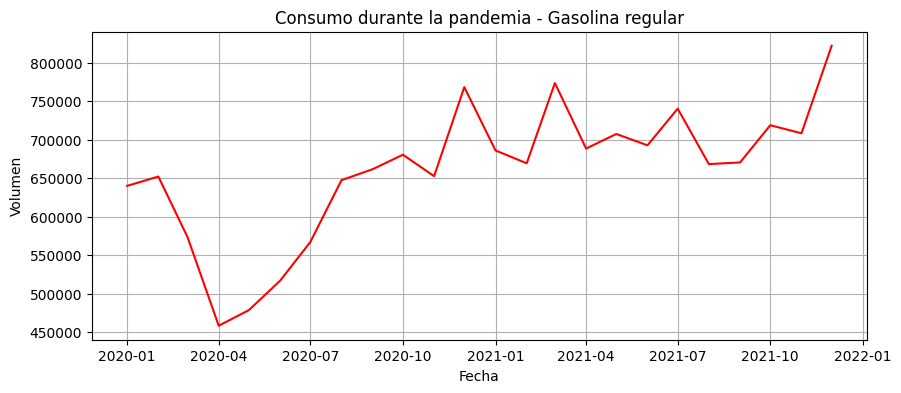

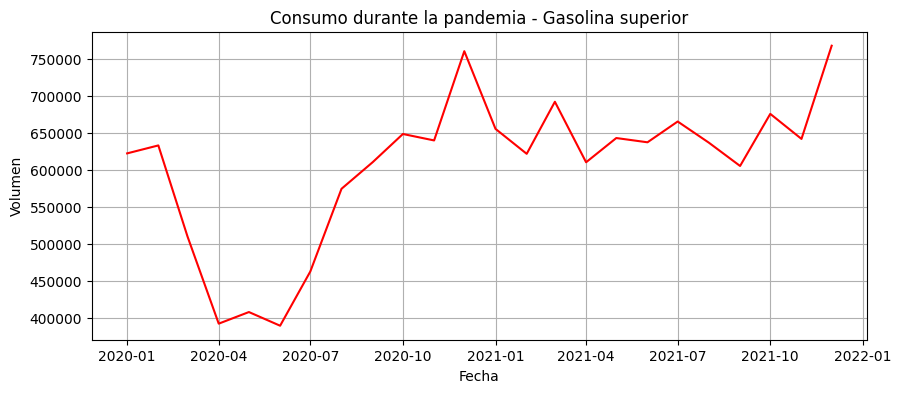

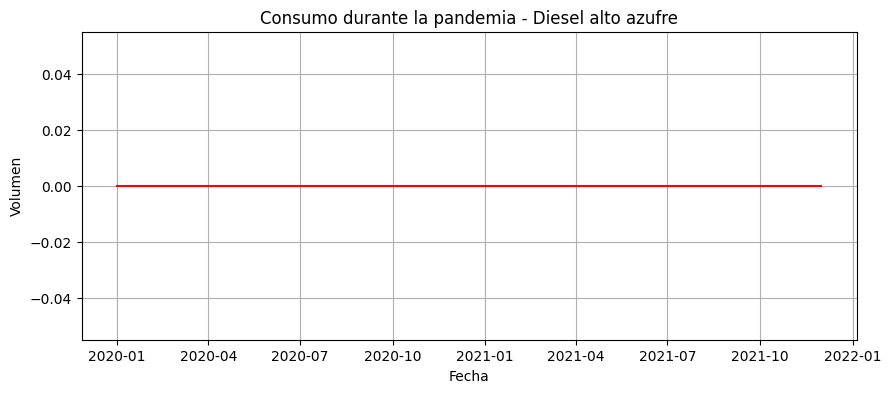

In [53]:
pandemia = consumo[(consumo['Año'] >= 2020) & (importaciones['Año'] <= 2022)]

for producto in productos:
    plt.figure(figsize=(10, 4))
    sns.lineplot(data=pandemia, x='Fecha', y=producto,color="red")
    plt.title(f'Consumo durante la pandemia - {producto}')
    plt.xlabel("Fecha")
    plt.ylabel("Volumen")
    plt.grid(True)
    plt.show()


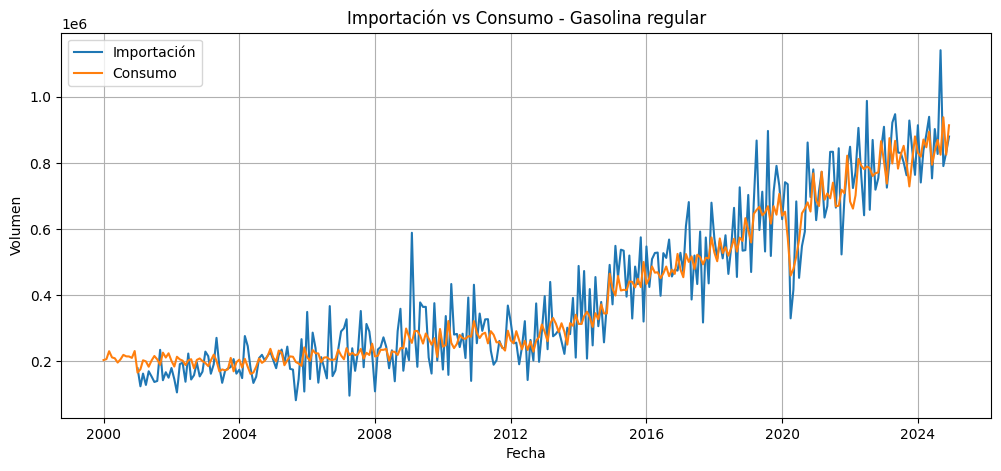

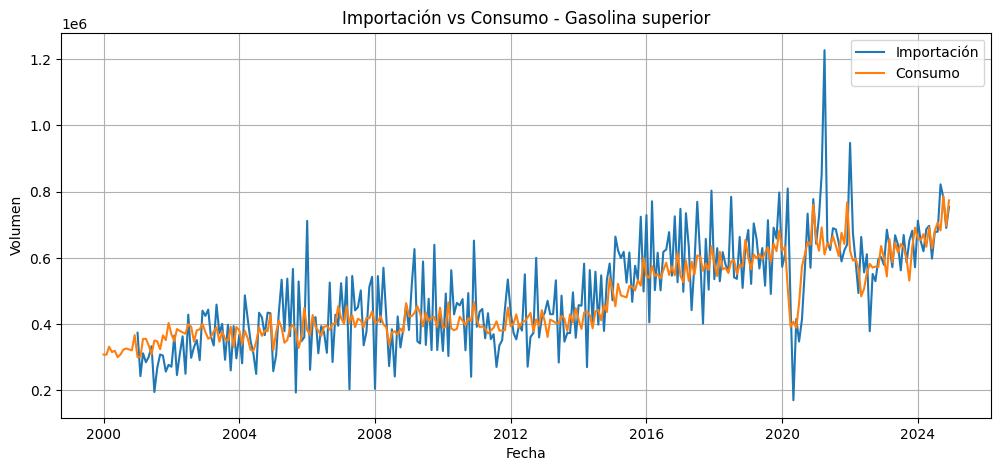

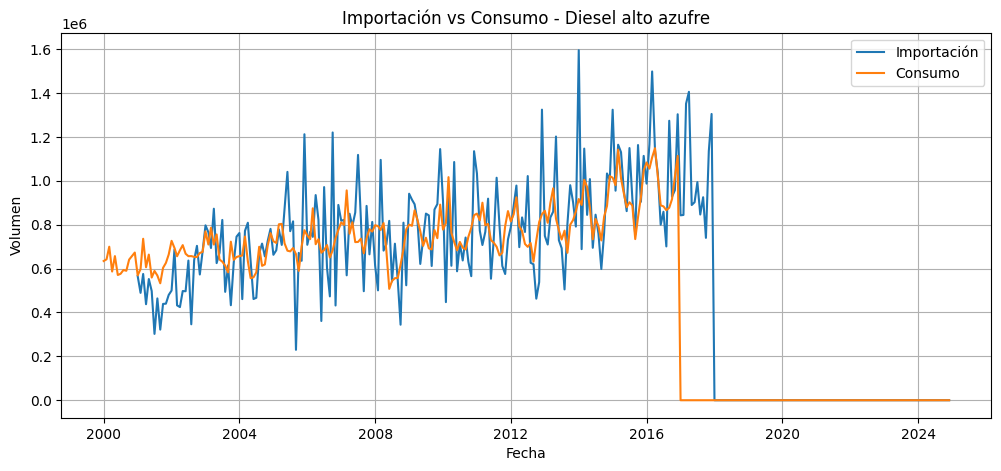

In [54]:
for producto in productos:
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=importaciones, x='Fecha', y=producto, label='Importación')
    sns.lineplot(data=consumo, x='Fecha', y=producto, label='Consumo')
    plt.title(f'Importación vs Consumo - {producto}')
    plt.xlabel("Fecha")
    plt.ylabel("Volumen")
    plt.legend()
    plt.grid(True)
    plt.show()
